# PART - 2/3 : FOR QQDMR :-

In [1]:
#importing libraries

from selenium import webdriver
from bs4 import BeautifulSoup
import chromedriver_binary
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from time import sleep
from nltk import word_tokenize
from nltk.corpus import stopwords
% matplotlib inline

In [2]:
df_qqdmr = pd.read_csv(r'result_for_mda.csv')
df_qqdmr.columns

Index(['CIK', 'CONAME', 'FYRMO', 'FDATE', 'FORM', 'SECFNAME',
       'mda_positive_score', 'mda_negative_score', 'mda_polarity_score',
       'mda_average_sentence_length', 'mda_percentage_of_complex_words',
       'mda_fog_index', 'mda_complex_word_count', 'mda_word_count',
       'mda_uncertainty_score', 'mda_constraining_score',
       'mda_positive_word_proportion', 'mda_negative_word_proportion',
       'mda_uncertainty_word_proportion', 'mda_constraining_word_proportion',
       'qqdmr_positive_score', 'qqdmr_negative_score', 'qqdmr_polarity_score',
       'qqdmr_average_sentence_length', 'qqdmr_percentage_of_complex_words',
       'qqdmr_fog_index', 'qqdmr_complex_word_count', 'qqdmr_word_count',
       'qqdmr_uncertainty_score', 'qqdmr_constraining_score',
       'qqdmr_positive_word_proportion', 'qqdmr_negative_word_proportion',
       'qqdmr_uncertainty_word_proportion',
       'qqdmr_constraining_word_proportion', 'rf_positive_score',
       'rf_negative_score', 'rf_polarity

In [3]:
df_qqdmr.head(3)

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME,mda_positive_score,mda_negative_score,mda_polarity_score,mda_average_sentence_length,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
0,3662,SUNBEAM CORP/FL/,199803,06-03-98,10-K405,https://www.sec.gov/Archives/edgar/data/3662/0...,5.0,15.0,-0.500000,13.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.0
1,3662,SUNBEAM CORP/FL/,199805,15-05-98,10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,3.0,26.0,-0.793103,12.323529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1044.0
2,3662,SUNBEAM CORP/FL/,199808,13-08-98,NT 10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


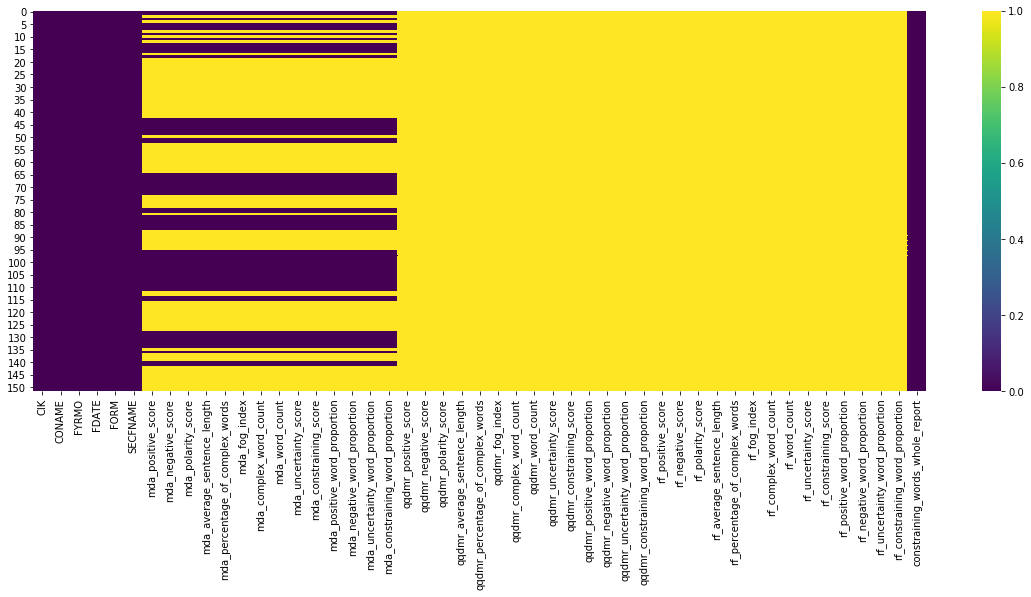

In [4]:
plt.figure(figsize=(20,7))
sns.heatmap(df_qqdmr.isnull(), cmap='viridis')

### calculate the qqdmr_positive_score :

In [5]:
def qqdmr_positive_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed, positive_words):
    no_of_postive_words = 0
    for i in range(0, len(super_final_content_extract_qqdmr_list_with_stopwords_removed)):
        if super_final_content_extract_qqdmr_list_with_stopwords_removed[i] in positive_words:
            no_of_postive_words += 1
    return no_of_postive_words

### calculate the qqdmr_negative_score :

In [6]:
def qqdmr_negative_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed, negative_words):
    no_of_negative_words = 0
    for i in range(0, len(super_final_content_extract_qqdmr_list_with_stopwords_removed)):
        if super_final_content_extract_qqdmr_list_with_stopwords_removed[i] in negative_words:
            no_of_negative_words += 1
    return no_of_negative_words

### calculate the qqdmr_polarity_score :

In [7]:
def qqdmr_polarity_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed, qqdmr_positive_score, qqdmr_negative_score):
    num = (qqdmr_positive_score - qqdmr_negative_score)
    den = ((qqdmr_positive_score + qqdmr_negative_score) + 0.000001)
    qqdmr_polarity_score = num/den
    return qqdmr_polarity_score

### calculate the qqdmr_average_sentence_length :

In [8]:
def qqdmr_average_sentence_length_fn(no_of_sentences, super_final_content_extract_qqdmr_list_with_stopwords_removed):
    return (len(super_final_content_extract_qqdmr_list_with_stopwords_removed)/no_of_sentences)
    

### calculate the qqdmr_uncertainity_score :

In [9]:
def qqdmr_uncertainty_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed):
    no_of_uncertain_words = 0
    for i in range(0, len(super_final_content_extract_qqdmr_list_with_stopwords_removed)):
        if super_final_content_extract_qqdmr_list_with_stopwords_removed[i] in uncertain_words:
            no_of_uncertain_words += 1
            
    return (no_of_uncertain_words)

### calculate the qqdmr_constraining_score :

In [10]:
def qqdmr_constraining_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed):
    no_of_constrain_words = 0
    for i in range(0, len(super_final_content_extract_qqdmr_list_with_stopwords_removed)):
        if super_final_content_extract_qqdmr_list_with_stopwords_removed[i] in constrain_words:
            no_of_constrain_words += 1
            
    return (no_of_constrain_words)

### calculate the qqdmr_complex_word_count :

In [11]:
def qqdmr_complex_word_count_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed):
    vowels = ['a','e','i','o','u']

    complex_word_count = 0
    for i in range(0, len(super_final_content_extract_qqdmr_list_with_stopwords_removed)):
        count_syllable = 0
        current_word = super_final_content_extract_qqdmr_list_with_stopwords_removed[i]
        for letter in current_word:
            if letter in vowels:
                count_syllable += 1
            if count_syllable > 2:
#                 print(word," is complex word")
                complex_word_count += 1
                break
        
    return complex_word_count

#     print("complex word count is ", complex_word_count)

## Importing the uncertainity words list :

In [12]:
uncertain = pd.read_csv(r'uncertainty_dictionary.csv')
uncertain.head()

,Word
0,ABEYANCE
1,ABEYANCES
2,ALMOST
3,ALTERATION
4,ALTERATIONS


In [13]:
uncertain['Word'].dropna(axis='rows',inplace=True)

In [14]:
len(uncertain['Word'])

297

In [15]:
uncertain_words = list(uncertain['Word'])
for i in range(0, len(uncertain_words)):
    uncertain_words[i] = uncertain_words[i].lower()

## Importing the constraining words list :

In [16]:
constrain = pd.read_csv(r'constraining_dictionary.csv')
constrain.head()

,Word
0,ABIDE
1,ABIDING
2,BOUND
3,BOUNDED
4,COMMIT


In [17]:
constrain['Word'].dropna(axis='rows',inplace=True)

In [18]:
len(constrain['Word'])

184

In [19]:
constrain_words = list(constrain['Word'])
for i in range(0, len(constrain_words)):
    constrain_words[i] = constrain_words[i].lower()

## Importing the +ve/-ve words csv file and making a list out of that :

In [20]:
pos_neg = pd.read_csv(r'positive_negative_words.csv')

In [21]:
pos_neg['positive'].dropna(axis='rows',inplace=True)

In [22]:
len(pos_neg['positive'])

354

In [23]:
pos_neg['negative'].dropna(axis='rows',inplace=True)

In [24]:
len(pos_neg['negative'])

2348

In [25]:
positive_words = list(pos_neg['positive'].astype('str'))
negative_words = list(pos_neg['negative'].astype('str'))

In [26]:
for i in range(0, len(positive_words)):
    positive_words[i] = positive_words[i].lower()

In [27]:
for i in range(0, len(negative_words)):
    negative_words[i] = negative_words[i].lower()

### Function to tokenize list and remove stop words :

In [28]:
def nltk_tokenizing(super_final_content_extract_qqdmr):
    # complete calculations
    
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    
    stopwords_list = set(stopwords.words('english'))
    super_final_content_extract_qqdmr_list = super_final_content_extract_qqdmr.split()
   
    # converting to lower case each element of the list
    
    for i in range(0, len(super_final_content_extract_qqdmr_list)):
        super_final_content_extract_qqdmr_list[i] = super_final_content_extract_qqdmr_list[i].lower() 
    
    super_final_content_extract_qqdmr_list_with_stopwords_removed = []    
    
    # creating a new list with the stopwords removed from our original data list :
    
    for j in range(0, len(super_final_content_extract_qqdmr_list)):
        if super_final_content_extract_qqdmr_list[j] in stopwords_list:
            continue
        else:
            super_final_content_extract_qqdmr_list_with_stopwords_removed.append(super_final_content_extract_qqdmr_list[j])
    
    return super_final_content_extract_qqdmr_list_with_stopwords_removed

    # returning the list with stop words removed, punctuation already removed and each letternow lowercase
    

### Function to calculate no of sentences :

In [29]:
def calculate_no_of_sentences(final_content_extract_qqdmr):
    dots = re.findall(r'\w\.\s{0,1}\w{1,1}', str(final_content_extract_qqdmr))
    return (len(dots) + 1) 

### Function to remove punctuation :

In [30]:
# from string import punctuation
def strip_punctuation(final_content_extract_qqdmr):
    return ''.join(c for c in final_content_extract_qqdmr if c not in punctuation)

# MAIN COMPUTATIONAL CELL :

In [31]:

for i in range(0, len(df_qqdmr)):   
    driver = webdriver.Chrome()
    secfname = df_qqdmr.ix[i, 'SECFNAME']
    
    
    driver.get(secfname)
    
    print(secfname)
    sleep(1)
    
    page_source = driver.page_source
    page_source = str(page_source)
    
    driver.close()
    driver.quit()
    
    # cleaning the page_source:
    
    page_source = page_source.replace('\n', ' ')
    page_source = page_source.replace('\t', ' ')
    page_source = page_source.split()
    page_source = ' '.join(page_source)
    
    # setting mark for <Page>

    page_source = page_source.replace('&lt;PAGE&gt;', '<Page>')
    page_source = page_source.replace('&lt;Page&gt;', '<Page>')
    
    
    try:
   
        # finding the existence for - Quantitative and Qualitative Disclosures about Market Risk : 
        evidence_qqdmr = re.findall(r"Quantitative and Qualitative Disclosures", page_source, re.IGNORECASE)

        # exists or not
        if len(evidence_qqdmr) > 0:
            present_qqdmr = True

        else:
            present_qqdmr = False

        # whether 'qqdmr' exists or not in the entire report:
        print(present_qqdmr, "for ",i," URL ")

        # if 'present_qqdmr'==True, then extracting the 'qqdmr' section via regex :

        if present_qqdmr == True:
            # possible best regex options :  
    
            content_extract_qqdmr_1 = re.findall(r"Item\s\d\.\sQuantitative and Qualitative Disclosures(.*?)\sItem\s\d{1,2}",page_source,re.IGNORECASE)
            content_extract_qqdmr_2 = re.findall(r"Item\s\d\.\sQuantitative and Qualitative Disclosures(.*?)\sItem\d",page_source,re.IGNORECASE)
            content_extract_qqdmr_3 = re.findall(r"Item\s\d\.\sQuantitative and Qualitative Disclosures(.*?)\s\d{1,2}\s<Page>",page_source,re.IGNORECASE)
            content_extract_qqdmr_4 = re.findall(r"Item\s\d\.\sQuantitative and Qualitative Disclosures(.*?)\s\d{1,2}\s<Page>",page_source,re.IGNORECASE)
            content_extract_qqdmr_5 = re.findall(r"Item\s\d\.\sQuantitative and Qualitative Disclosures(.*?)\s-\d\d-\s<Page>",page_source,re.IGNORECASE)
            content_extract_qqdmr_6 = re.findall(r"Item\s\d(\w)\.\sQuantitative and Qualitative Disclosures(.*?)\s\d\d\s<Page>",page_source,re.IGNORECASE)
            content_extract_qqdmr_7 = re.findall(r"Item\s\d{1,2}\.\sQuantitative and Qualitative Disclosures(.*?)\s-d{1,2}-\s<Page>",page_source,re.IGNORECASE)
            content_extract_qqdmr_8 = re.findall(r"Item\s\d{1,2}\.\sQuantitative and Qualitative Disclosures(.*?)<Page>",page_source,re.IGNORECASE)
            content_extract_qqdmr_9 = re.findall(r"Item\s\d\sQuantitative and Qualitative Disclosures(.*?)\s\d{1,2}\s<Page>",page_source,re.IGNORECASE)
            
            
            # setting up finally the extracted 'qqdmr' section obtained:
            final_content_extract_qqdmr = ''   
            
            
            if (len(content_extract_qqdmr_1) > 0) :
                print("content_extract_qqdmr_1")
                final_content_extract_qqdmr = content_extract_qqdmr_1
            
            if (len(content_extract_qqdmr_2) > 0)  :
                print("content_extract_qqdmr_2")
                final_content_extract_qqdmr = content_extract_qqdmr_2
            
            if (len(content_extract_qqdmr_3) > 0)  :
                print("content_extract_qqdmr_3")
                final_content_extract_qqdmr = content_extract_qqdmr_3
            
            if (len(content_extract_qqdmr_4) > 0)  :
                print("content_extract_qqdmr_4")
                final_content_extract_qqdmr = content_extract_qqdmr_4
            
            if (len(content_extract_qqdmr_5) > 0) :
                print("content_extract_qqdmr_5")
                final_content_extract_qqdmr = content_extract_qqdmr_5
            
            if (len(content_extract_qqdmr_6) > 0) :
                print("content_extract_qqdmr_6")
                final_content_extract_qqdmr = content_extract_qqdmr_6
            
            if (len(content_extract_qqdmr_7) > 0) :
                print("content_extract_qqdmr_7")
                final_content_extract_qqdmr = content_extract_qqdmr_7
            
            if (len(content_extract_qqdmr_8) > 0) :
                print("content_extract_qqdmr_8")
                final_content_extract_qqdmr = content_extract_qqdmr_8
            
            if (len(content_extract_qqdmr_9) > 0) :
                print("content_extract_qqdmr_9")
                final_content_extract_qqdmr = content_extract_qqdmr_9
            
            
            
            # further setting up :

            if (len(final_content_extract_qqdmr[0]) > 1):
                final_content_extract_qqdmr = final_content_extract_qqdmr[0].split()
                final_content_extract_qqdmr = final_content_extract_qqdmr[6:]
                final_content_extract_qqdmr = ' '.join(final_content_extract_qqdmr)
                final_content_extract_qqdmr = str(final_content_extract_qqdmr)

                # calculating the no. of sentences before the removal of punctuation characters:
                
                no_of_sentences = calculate_no_of_sentences(final_content_extract_qqdmr)
                print("no of sentences", no_of_sentences)
                
                # removing punctuations :
                
                final_content_extract_qqdmr_punc = strip_punctuation(final_content_extract_qqdmr)

                
                # removing all numeric digits :
                
                remove_numeric_qqdmr = ''
                for each_letter in  final_content_extract_qqdmr_punc:
                    if each_letter.isdigit()==False:
                        remove_numeric_qqdmr = remove_numeric_qqdmr + each_letter
                
                
                
                # after removing all the numeric digits and framing properly once again:
                super_final_content_extract_qqdmr = ' '.join(remove_numeric_qqdmr.split())

                # CALLING THE TOKENIZING FUNCTION TO LOWERCASE WORDS AND REMOVE STOPWORDS:
                super_final_content_extract_qqdmr_list_with_stopwords_removed = nltk_tokenizing(super_final_content_extract_qqdmr)
                print("length of super final", len(super_final_content_extract_qqdmr_list_with_stopwords_removed))
                
                # calculating the qqdmr_positive_score - fn :
                qqdmr_positive_score = qqdmr_positive_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed, positive_words)
                print("qqdmr_positive_score ", qqdmr_positive_score)
                df_qqdmr.ix[i, 'qqdmr_positive_score'] = qqdmr_positive_score
                
                # calculating the qqdmr_negative_score - fn :
                qqdmr_negative_score = qqdmr_negative_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed, negative_words)
                print("qqdmr_negative_score ", qqdmr_negative_score)
                df_qqdmr.ix[i, 'qqdmr_negative_score'] = qqdmr_negative_score

                # calculating the qqdmr_polarity score - fn :
                qqdmr_polarity_score = qqdmr_polarity_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed, qqdmr_positive_score, qqdmr_negative_score)
                print("qqdmr_polarity_score ", qqdmr_polarity_score)
                df_qqdmr.ix[i, 'qqdmr_polarity_score'] = qqdmr_polarity_score

                # calculating the qqdmr_average sentence length - fn :
                qqdmr_average_sentence_length = qqdmr_average_sentence_length_fn(no_of_sentences, super_final_content_extract_qqdmr_list_with_stopwords_removed)
                print("qqdmr_average_sentence_length ", qqdmr_average_sentence_length)
                df_qqdmr.ix[i, 'qqdmr_average_sentence_length'] = qqdmr_average_sentence_length

                # calculating the qqdmr_word_count :
                qqdmr_word_count = len(super_final_content_extract_qqdmr_list_with_stopwords_removed)
                print("qqdmr_word_count", qqdmr_word_count)
                df_qqdmr.ix[i, 'qqdmr_word_count'] = qqdmr_word_count

                # calculating the qqdmr_complex_word_count - fn :
                qqdmr_complex_word_count = qqdmr_complex_word_count_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed)
                print("qqdmr_complex_word_count ", qqdmr_complex_word_count)
                df_qqdmr.ix[i, 'qqdmr_complex_word_count'] = qqdmr_complex_word_count

                # calculating the qqdmr_percentage_of_complex_words :
                qqdmr_percentage_of_complex_words = (qqdmr_complex_word_count)/(qqdmr_word_count)
                print("qqdmr_percentage_of_complex_words, ", qqdmr_percentage_of_complex_words)
                df_qqdmr.ix[i, 'qqdmr_percentage_of_complex_words'] = qqdmr_percentage_of_complex_words

                # calculating the qqdmr_fog_index :
                qqdmr_fog_index = 0.4*(qqdmr_average_sentence_length + qqdmr_percentage_of_complex_words)
                print("qqdmr_fog_index ", qqdmr_fog_index)
                df_qqdmr.ix[i, 'qqdmr_fog_index'] = qqdmr_fog_index

                # calculating the qqdmr_uncertainity_score - fn :
                qqdmr_uncertainty_score = qqdmr_uncertainty_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed)
                print("qqdmr_uncertainty_score ", qqdmr_uncertainty_score)
                df_qqdmr.ix[i, 'qqdmr_uncertainty_score'] = qqdmr_uncertainty_score

                # calculating the qqdmr_constraining_score - fn :
                qqdmr_constraining_score = qqdmr_constraining_score_fn(super_final_content_extract_qqdmr_list_with_stopwords_removed)
                print("qqdmr_constraining_score ", qqdmr_constraining_score)
                df_qqdmr.ix[i, 'qqdmr_constraining_score'] = qqdmr_constraining_score

                # calculating the qqdmr_positive_word_proportion :
                qqdmr_positive_word_proportion = (qqdmr_positive_score)/(qqdmr_word_count)
                print("qqdmr_positive_word_proportion ", qqdmr_positive_word_proportion)
                df_qqdmr.ix[i, 'qqdmr_positive_word_proportion'] = qqdmr_positive_word_proportion

                # calculating the qqdmr_negative_word_proportion :
                qqdmr_negative_word_proportion = (qqdmr_negative_score)/(qqdmr_word_count)
                print("qqdmr_negative_word_proportion", qqdmr_negative_word_proportion)
                df_qqdmr.ix[i, 'qqdmr_negative_word_proportion'] = qqdmr_negative_word_proportion

                # calculating the qqdmr_uncertainty_word_proportion : 
                qqdmr_uncertainty_word_proportion = (qqdmr_uncertainty_score)/(qqdmr_word_count)
                print("qqdmr_uncertainty_word_proportion ", qqdmr_uncertainty_word_proportion)
                df_qqdmr.ix[i, 'qqdmr_uncertainty_word_proportion'] = qqdmr_uncertainty_word_proportion

                # calculating the qqdmr_constraining_word_proportion :
                qqdmr_constraining_word_proportion = (qqdmr_constraining_score)/(qqdmr_word_count)
                print("qqdmr_constraining_word_proportion", qqdmr_constraining_word_proportion)
                print()
                df_qqdmr.ix[i, 'qqdmr_constraining_word_proportion'] = qqdmr_constraining_word_proportion
            
            else:
                continue

        elif present_qqdmr == False:
            continue
            
    except:
        continue
    
    

C:\anaconda5\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-000413.txt
False for  0  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-001001.txt
False for  1  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-98-000783.txt
False for  2  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002145.txt
False for  3  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-98-001203.txt
False for  4  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002278.txt
False for  5  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002401.txt
False for  6  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002402.txt
False for  7  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-000362.txt
False for  8  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-99-000775.txt
False for  9  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-000584.txt
False for  10  URL 
https://www.sec.gov/

False for  50  URL 
https://www.sec.gov/Archives/edgar/data/4457/0000004457-01-500081.txt
True for  51  URL 
content_extract_qqdmr_1
content_extract_qqdmr_3
content_extract_qqdmr_4
content_extract_qqdmr_8
no of sentences 3
length of super final 9
qqdmr_positive_score  0
qqdmr_negative_score  0
qqdmr_polarity_score  0.0
qqdmr_average_sentence_length  3.0
qqdmr_word_count 9
qqdmr_complex_word_count  3
qqdmr_percentage_of_complex_words,  0.3333333333333333
qqdmr_fog_index  1.3333333333333335
qqdmr_uncertainty_score  0
qqdmr_constraining_score  0
qqdmr_positive_word_proportion  0.0
qqdmr_negative_word_proportion 0.0
qqdmr_uncertainty_word_proportion  0.0
qqdmr_constraining_word_proportion 0.0

https://www.sec.gov/Archives/edgar/data/4457/0000004457-01-500083.txt
True for  52  URL 
content_extract_qqdmr_1
content_extract_qqdmr_3
content_extract_qqdmr_4
content_extract_qqdmr_8
no of sentences 3
length of super final 9
qqdmr_positive_score  0
qqdmr_negative_score  0
qqdmr_polarity_score  0.0


True for  98  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-00-000009.txt
True for  99  URL 
content_extract_qqdmr_1
content_extract_qqdmr_5
content_extract_qqdmr_8
no of sentences 3
length of super final 10
qqdmr_positive_score  0
qqdmr_negative_score  0
qqdmr_polarity_score  0.0
qqdmr_average_sentence_length  3.3333333333333335
qqdmr_word_count 10
qqdmr_complex_word_count  4
qqdmr_percentage_of_complex_words,  0.4
qqdmr_fog_index  1.4933333333333334
qqdmr_uncertainty_score  0
qqdmr_constraining_score  0
qqdmr_positive_word_proportion  0.0
qqdmr_negative_word_proportion 0.0
qqdmr_uncertainty_word_proportion  0.0
qqdmr_constraining_word_proportion 0.0

https://www.sec.gov/Archives/edgar/data/6201/0000950134-00-006067.txt
True for  100  URL 
content_extract_qqdmr_1
content_extract_qqdmr_5
content_extract_qqdmr_8
no of sentences 4
length of super final 16
qqdmr_positive_score  0
qqdmr_negative_score  0
qqdmr_polarity_score  0.0
qqdmr_average_sentence_length  4.0
qqdmr_word

https://www.sec.gov/Archives/edgar/data/6201/0000006201-03-000045.txt
True for  115  URL 
content_extract_qqdmr_1
content_extract_qqdmr_5
content_extract_qqdmr_8
no of sentences 3
length of super final 13
qqdmr_positive_score  0
qqdmr_negative_score  0
qqdmr_polarity_score  0.0
qqdmr_average_sentence_length  4.333333333333333
qqdmr_word_count 13
qqdmr_complex_word_count  5
qqdmr_percentage_of_complex_words,  0.38461538461538464
qqdmr_fog_index  1.8871794871794874
qqdmr_uncertainty_score  0
qqdmr_constraining_score  0
qqdmr_positive_word_proportion  0.0
qqdmr_negative_word_proportion 0.0
qqdmr_uncertainty_word_proportion  0.0
qqdmr_constraining_word_proportion 0.0

https://www.sec.gov/Archives/edgar/data/6201/0000006201-08-000060.txt
True for  116  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000009.txt
True for  117  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000016.txt
True for  118  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-0

# OUTPUT CSV - for QQDMR only :

In [32]:
df_qqdmr.to_csv(r'result_for_mda_and_qqdmr.csv',index=False)

## Visualizing the null/empty parts of the latest obtained dataFrame : 

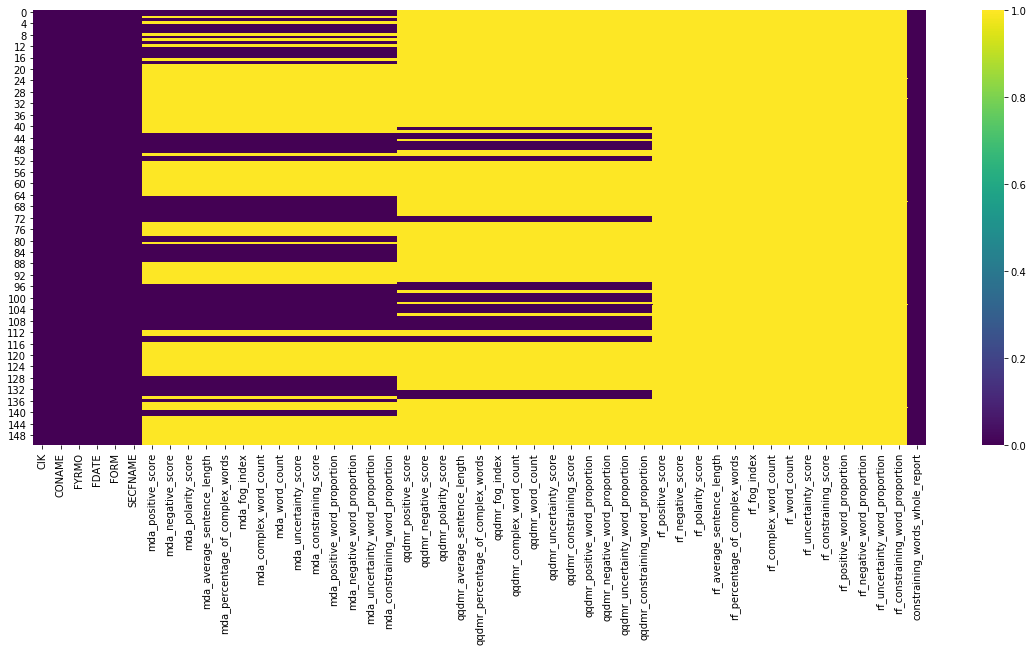

In [154]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_qqdmr.isnull(), cmap='viridis') 